In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from typing import Callable
from numbers import Number
import pandas as pd

In [2]:
class ExponentialDistribution:

    def __init__(self, scale: float, a: float, b: float):
        self.scale = scale
        self.a = a
        self.b = b
    
    def sample(self, n: int) -> np.ndarray:
        """Get samples from the exponential distribution."""
        u = np.random.uniform(self.a, self.b, n)
        return self.inverse_cdf(u)
    
    def cdf(self, x: np.ndarray) -> np.ndarray:
        """Cumulative distribution function."""
        return self.scale*(1 - np.exp(-x))
    
    def pdf(self, x: np.ndarray) -> np.ndarray:
        """Probability density function."""
        return self.scale * np.exp(-x)
    
    def inverse_cdf(self, p: np.ndarray) -> np.ndarray:
        """Inverse cumulative distribution function."""
        # np.log is the natural log
        return -np.log(1 - (p/self.scale))

    def importance_sampling_integration(self, func: Callable[[Number], Number], n: int) -> float:
        """Importance sampling integration."""
        samples = self.sample(n)
        weighted_samples = func(samples) / self.pdf(samples)
        return np.mean(weighted_samples)


In [3]:
def g(x):
    return np.exp(-x**2)

def uniform_integration(func, a, b, n_samples):
    samples = np.random.uniform(a, b, n_samples)
    func_samples = func(samples)
    integral_estimate = (b - a) * np.mean(func_samples)
    return integral_estimate

In [4]:
scale = np.e/(np.e-1)
a = 0
b = 1
expon = ExponentialDistribution(scale, a, b)
real_value, real_error = integrate.quad(g, 0, 1)
print(f"Real value of the integral: {real_value} +- {real_error}")

Real value of the integral: 0.7468241328124271 +- 8.291413475940725e-15


In [5]:
n_samples = np.logspace(1, 6, num=100, dtype=int)
results = {
    'uniform': [],
    'uniform_relative_error': [],
    'importance': [],
    'importance_relative_error': []
}
for n in n_samples:
    print(f'Running for n_samples: {n}')
    # Uniform integration
    uniform_estimate = uniform_integration(g, 0, 1, n)
    # Importance sampling using a exponential distribution
    importance_estimate = expon.importance_sampling_integration(g, n)
    # Calculate relative errors
    uniform_relative_error = np.abs(uniform_estimate - real_value) / real_value
    importance_relative_error = np.abs(importance_estimate - real_value) / real_value
    # Store results
    results['uniform'].append(uniform_estimate)
    results['uniform_relative_error'].append(uniform_relative_error)
    results['importance'].append(importance_estimate)
    results['importance_relative_error'].append(importance_relative_error)
    print(f"Uniform Estimate: {uniform_estimate:.6f}, Importance Estimate: {importance_estimate:.6f}")
results = pd.DataFrame.from_dict(results)
results['n_samples'] = n_samples
results.to_csv('ex9.csv', index=False)

Running for n_samples: 10
Uniform Estimate: 0.772060, Importance Estimate: 0.748694
Running for n_samples: 11
Uniform Estimate: 0.801140, Importance Estimate: 0.747347
Running for n_samples: 12
Uniform Estimate: 0.825133, Importance Estimate: 0.750282
Running for n_samples: 14
Uniform Estimate: 0.669418, Importance Estimate: 0.759877
Running for n_samples: 15
Uniform Estimate: 0.677106, Importance Estimate: 0.763373
Running for n_samples: 17
Uniform Estimate: 0.820805, Importance Estimate: 0.754367
Running for n_samples: 20
Uniform Estimate: 0.811955, Importance Estimate: 0.762618
Running for n_samples: 22
Uniform Estimate: 0.732230, Importance Estimate: 0.740624
Running for n_samples: 25
Uniform Estimate: 0.717166, Importance Estimate: 0.751274
Running for n_samples: 28
Uniform Estimate: 0.720949, Importance Estimate: 0.725779
Running for n_samples: 31
Uniform Estimate: 0.750865, Importance Estimate: 0.750457
Running for n_samples: 35
Uniform Estimate: 0.703256, Importance Estimate: 0

In [6]:
results = pd.read_csv('ex9.csv')
results

,uniform,uniform_relative_error,importance,importance_relative_error,n_samples
0,0.772060,0.033791,0.748694,0.002504,10
1,0.801140,0.072729,0.747347,0.000700,11
2,0.825133,0.104855,0.750282,0.004630,12
3,0.669418,0.103647,0.759877,0.017477,14
4,0.677106,0.093353,0.763373,0.022159,15
...,...,...,...,...,...
95,0.747075,0.000336,0.746891,0.000089,628029
96,0.746640,0.000247,0.746800,0.000032,705480
97,0.746816,0.000011,0.746815,0.000012,792482
98,0.746509,0.000422,0.746909,0.000113,890215


# Absolute Value

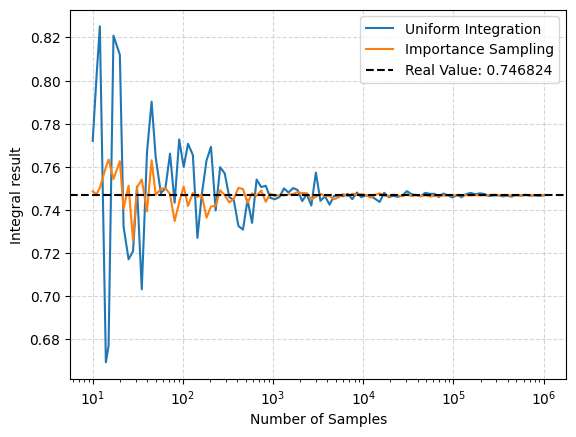

In [17]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5)
ax.plot(results['n_samples'].values, results['uniform'].values, label='Uniform Integration')
ax.plot(results['n_samples'].values, results['importance'].values, label='Importance Sampling')
ax.axhline(real_value, label=f'Real Value: {real_value:.6f}', color='black', linestyle='--')
ax.set_xlabel('Number of Samples')
# ax.set_ylabel('Integral Estimate')
ax.set_ylabel('Integral result')
ax.legend()
ax.set_xscale('log')

fig.savefig('ex9_absolute_value.png', dpi=300)

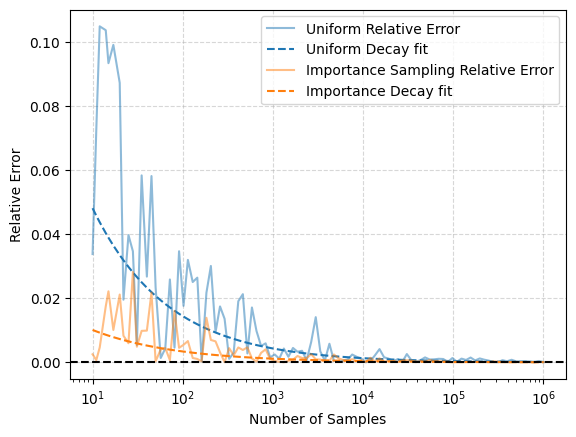

In [19]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5)

lines = ax.plot(results['n_samples'], results['uniform_relative_error'], label='Uniform Relative Error', alpha=0.5)
uniform_fit = np.polyfit(np.log(results['n_samples']), np.log(results['uniform_relative_error']), 1)
ax.plot(results['n_samples'], np.exp(np.polyval(uniform_fit, np.log(results['n_samples']))), label='Uniform Decay fit', linestyle='--', color=lines[0].get_color())

lines = ax.plot(results['n_samples'], results['importance_relative_error'], label='Importance Sampling Relative Error', alpha=0.5)
importance_fit = np.polyfit(np.log(results['n_samples']), np.log(results['importance_relative_error']), 1)
ax.plot(results['n_samples'], np.exp(np.polyval(importance_fit, np.log(results['n_samples']))), label='Importance Decay fit', linestyle='--', color=lines[0].get_color())

ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Relative Error')
ax.legend()
ax.set_xscale('log')

fig.savefig('ex9_relative_error.png', dpi=300)